In [79]:
from astropy.table import Table, Column
from astLib import astCoords
import numpy as np
import matplotlib.pyplot as plt

In [80]:
pm = Table.read('snc3.pm.fits')
mag = Table.read('snc3.mags.fits')
racen = astCoords.hms2decimal('03:30:35',':')
deccen = astCoords.dms2decimal('-28:06:00',':')
racen = np.deg2rad(racen)
deccen = np.deg2rad(deccen)
x0 = np.deg2rad(pm['X0'])
y0 = np.deg2rad(pm['Y0'])

In [81]:
# do gnomonic transformation
# used equation from http://mathworld.wolfram.com/GnomonicProjection.html
pho = np.sqrt(x0**2+y0**2)
c = np.arctan(pho)
dec = np.arcsin(np.cos(c) * np.sin(deccen) + y0 * np.sin(c) * np.cos(deccen) / pho)
ra = racen + np.arctan(x0 * np.sin(c) / (pho * np.cos(deccen) * np.cos(c) - y0 * np.sin(deccen) * np.sin(c)))
ra = np.rad2deg(ra)
dec = np.rad2deg(dec)

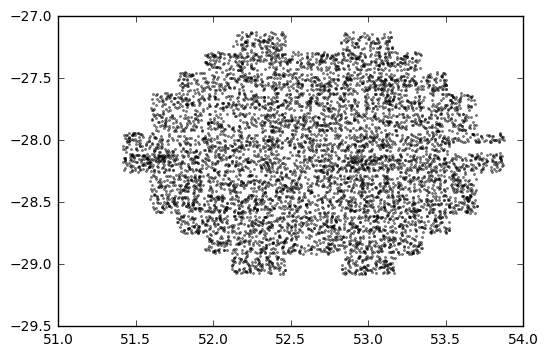

In [82]:
# check if the transformation make sense
plt.plot(ra,dec,'k.', ms=3,alpha=0.5)
plt.show()

In [43]:
addra  = Column(ra, name='ra')
adddec = Column(dec, name='dec')
pm.add_column(adddec, index=0)
pm.add_column(addra, index=0)

pm.write('snc3.pm_wRADec.fits', format='fits')

In [44]:
# Matched RA/Dec in TOPCAT and get a new fits file magXpm

/Users/tingli/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4186 but corresponding boolean dimension is 2335


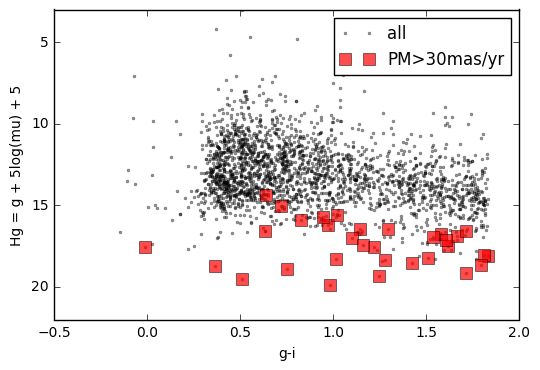

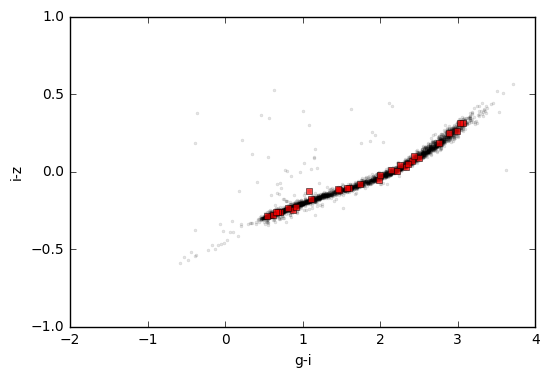

In [86]:
# plot RPM diagram
data = Table.read('snc3.magXpm.fits')
data['g'] = data['g'] - 5.5
data['i'] = data['i'] - 5.5 + 0.17
highpm = np.sqrt(data['PMX']**2+data['PMY']**2) > 30

plt.figure()
plt.plot(data['g']-data['i'], data['g']+5+5*np.log10(np.sqrt(data['PMX']**2+data['PMY']**2)/1000), 'k.', ms=4, alpha=0.4, label='all')
plt.plot(data['g'][highpm]-data['i'][highpm], data['g'][highpm]+5+5*np.log10(np.sqrt(data['PMX'][highpm]**2+data['PMY'][highpm]**2)/1000), 'rs', ms=8, alpha=0.7,label='PM>30mas/yr')
plt.legend()
plt.ylim(22,3)
plt.xlabel('g-i')
plt.ylabel('Hg = g + 5log(mu) + 5')

plt.figure()
plt.plot(mag['g']-mag['i'],mag['i']-mag['z'],'k.', ms=4, alpha=0.1)
plt.plot(mag['g'][highpm]-mag['i'][highpm],mag['i'][highpm]-mag['z'][highpm], 'rs', ms=4, alpha=0.7,label='PM>30mas/yr')
plt.ylim(-1,1)
plt.xlabel('g-i')
plt.ylabel('i-z')
plt.show()

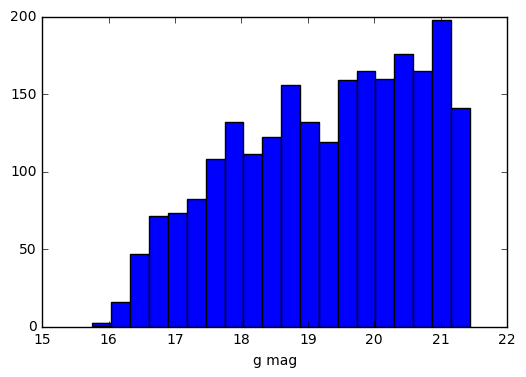

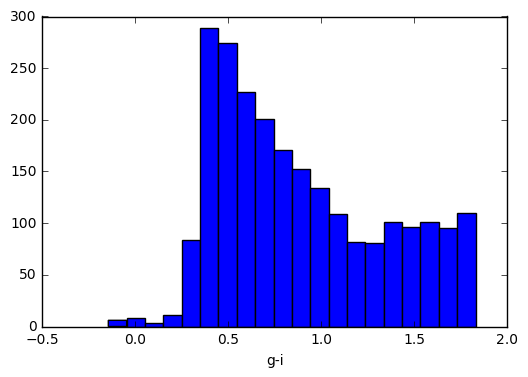

In [64]:
plt.figure()
plt.hist(data['g'],bins=20)
plt.xlabel('g mag')
plt.figure()
plt.hist(data['g']-data['i'],bins=20)
plt.xlabel('g-i')
plt.show()

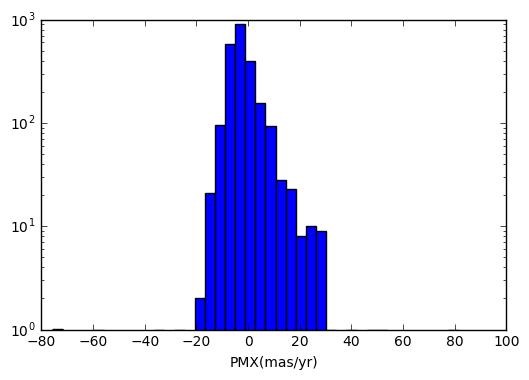

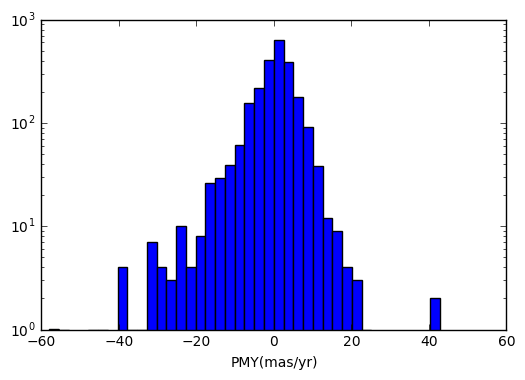

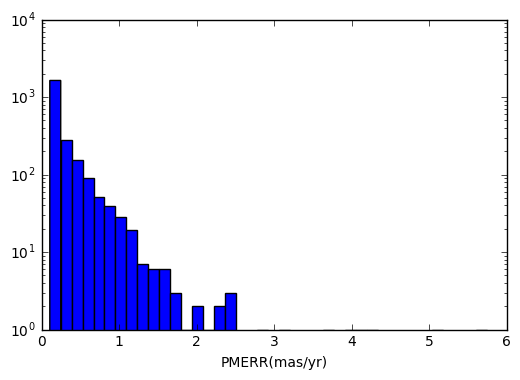

In [65]:
plt.figure()
plt.hist(data['PMX'],bins=40)
plt.yscale('log')
plt.xlabel('PMX(mas/yr)')
plt.figure()
plt.hist(data['PMY'],bins=40)
plt.yscale('log')
plt.xlabel('PMY(mas/yr)')
plt.figure()
plt.hist(data['PMERR'],bins=40)
plt.yscale('log')
plt.xlabel('PMERR(mas/yr)')
plt.show()

In [66]:
data

Dec_1,g,g_ERR,i,i_ERR,r,RA_1,r_ERR,z,z_ERR,ra_2,dec_2,X0,Y0,XYERR,PMX,PMY,PMERR,Separation
,,,,,,,,,,,,,,,,,,arcsec
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-28.8683104776,19.207340293,9.73532684302e-05,18.2904824661,4.88120649963e-05,-100.0,52.3328148476,-100.0,23.8099229523,4.80222501321e-05,52.3328759867,-28.8683232837,-0.27409307174,-0.768730781028,5.12250630939e-08,-3.01062747678,1.06838550139,0.163129382634,0.198185904198
-28.9903910696,20.2565440951,0.000209314631404,19.697455496,0.000174960720801,-100.0,52.8686930937,-100.0,25.2817953123,0.000184087823852,52.86875727,-28.9904059289,0.195015957916,-0.890661509641,7.18807753178e-08,-4.75133253392,-5.2281394994,0.231514674164,0.209046230643
-28.7187052825,17.9430950115,5.02260467349e-05,16.9744170374,2.88247775226e-05,-100.0,51.8097980198,-100.0,22.4732610139,2.72418482225e-05,51.8098597762,-28.7187167807,-0.733216930337,-0.621311273822,5.54984592216e-08,-7.01704817293,1.88119173348,0.173596058993,0.199320366278
-28.3180904935,17.8534156935,4.87254963423e-05,17.2833462334,3.09875680738e-05,-100.0,53.0243610568,-100.0,22.8742635451,2.59668288611e-05,53.0244020623,-28.3181093492,0.333270088796,-0.218632687327,3.86356432574e-08,-5.33325107062,2.74599845187,0.123075636678,0.146614460732
-27.8614932327,18.1569900465,5.31171528349e-05,17.7858586995,3.4724309013e-05,-100.0,51.9726232232,-100.0,23.4046565215,3.50925071393e-05,51.9726646253,-27.8615001095,-0.595158393621,0.236867306906,4.19762662378e-08,-3.05906565931,-2.53971299343,0.133912962273,0.134075321794
-27.681059783,17.418543181,4.28301378933e-05,16.422202966,4.22615664194e-05,-100.0,52.3271022739,-100.0,21.9322479048,2.66682958033e-05,52.3271422212,-27.681068872,-0.282225510432,0.418573958746,7.07895536479e-08,0.800722501438,0.677068364064,0.213126059285,0.1314872074
-27.1473250761,18.937990366,8.50427457534e-05,18.6031401924,5.88797351962e-05,-100.0,52.8606541445,-100.0,24.2319185524,6.8569013545e-05,52.8606797795,-27.1473295696,0.191205181465,0.952594639431,5.23523635028e-08,-3.75289995014,-1.32536961207,0.167093478041,0.0836975504788
-27.6583732404,20.9395529598,0.000451488410219,20.492331781,0.000713417101331,-100.0,52.6683045911,-100.0,-100.0,-100.0,52.6683439764,-27.6583881346,0.0199389670872,0.441618792285,3.25741584627e-07,-7.57573916788,2.7627811748,1.17025437042,0.136552599155


In [38]:
np.mean(data['PMX'])

-2.0921743951219489